In [1]:
from __future__ import division
from sympy import *
from sympy.abc import x, mu, theta
from sympy.stats import *
import numpy as np

init_printing()

In [2]:
def lp(pdf, param): 
    return diff(log(pdf), param)

def lpp(pdf, param): 
    return diff(log(pdf), param, 2)

def fisher_info(dist, X, *params):
    pdf = dist.pdf(X)
    funk = summation if dist.set.is_iterable else integrate

    fm = np.array([])
    for i in params:
        for j in params:
            fm = np.append(fm, -funk(diff(simplify(log(pdf)), i, j)*pdf, (X, dist.set.inf, dist.set.sup)))
    return fm

def dali(dist, Xs):
    pass

def ps(f):
    display(simplify(f))

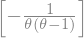

In [3]:
f1 = Lambda(x, theta**x * (1-theta)**(1-x))
dist = DiscreteDistributionHandmade(f1, set=FiniteSet(0, 1))
fisher = fisher_info(dist, x, theta)
ps(fisher)

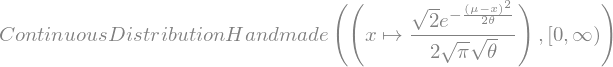

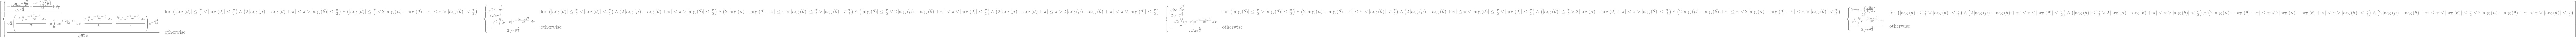

In [8]:
x = Symbol('x', real=True)
mu = Symbol('mu', real=True)
theta = Symbol('theta', real=True)

pdf2 = sqrt(2*pi*theta)**(-1) * exp(-(x-mu)**2/(2*theta))
dist = ContinuousDistributionHandmade(Lambda(x, pdf2), set=Interval(0, oo))

ps(dist)
fisher = fisher_info(dist, x, theta, mu)
ps(fisher)
# ps(-integrate(diff(simplify(log(dist)), theta, theta)*dist, (x, -oo, oo)))